In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, f1_score
from sklearn. linear_model import LassoCV
from scipy.spatial.distance import cdist
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
# import eif
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder, OneHotEncoder, TargetEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.preprocessing import PolynomialFeatures, QuantileTransformer, PowerTransformer
from sklearn.model_selection import train_test_split 
from sklearn.compose import ColumnTransformer, make_column_transformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso, ElasticNet, BayesianRidge, LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn import svm
from sklearn.feature_selection import RFECV
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score, log_loss, zero_one_loss
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_selection import SelectPercentile
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import VotingRegressor
from matplotlib.colors import ListedColormap
from sklearn.model_selection import RepeatedKFold, KFold, StratifiedKFold
from sklearn import tree
from IPython.display import Image
from sklearn import datasets
from sklearn.tree import export_graphviz
from sklearn.feature_selection import VarianceThreshold

In [2]:
path_train = 'train_house_B.csv'
df=pd.read_csv(path_train)
df.head(10)


,price,0,1,2,3,4,5,6,7,8,...,19,20,21,22,23,24,25,26,27,28
0,2604000,1.222962,0.047686,-1.033389,-2.465344,0.831065,0.802990,1.590989,0.727946,0.893957,...,-0.141322,-0.554035,-1.308863,-0.570187,-0.882735,-0.805741,-0.929397,0.232557,-0.679063,1.307431
1,4900000,-0.091662,-0.356325,-0.486840,-2.465344,-0.126718,-0.024866,-0.323972,1.658337,1.751428,...,-0.141322,-0.554035,0.047278,-0.570187,-0.897850,-0.805741,0.224410,0.864016,1.472618,-0.478408
2,4480000,1.222962,-1.064819,0.338749,0.405623,-0.854973,-0.654330,0.525426,0.585866,-1.661101,...,-0.141322,-0.554035,-1.308863,-0.570187,-0.491114,0.355976,-0.929397,1.118967,1.472618,1.307431
3,3234000,1.222962,-1.570692,-0.696696,0.405623,-0.670784,-0.024866,0.557116,-1.280083,1.273040,...,-0.141322,-0.554035,1.403419,-0.570187,-0.724485,-0.805741,0.224410,0.924687,-0.679063,-0.478408
4,3780000,-1.406286,-1.563680,-1.058295,0.405623,-0.126718,-0.879174,-1.649281,0.496669,0.255596,...,-0.141322,1.804941,0.047278,-0.570187,-0.306965,-0.805741,1.378217,0.170486,-0.679063,-0.478408
5,3710000,-0.091662,0.913979,0.401014,0.405623,-0.126718,-0.720461,-1.424048,-1.631171,0.363326,...,-0.141322,-0.554035,0.047278,-0.570187,-0.201795,-0.805741,-0.929397,0.775967,-0.679063,-0.478408
6,3360000,-0.091662,1.177450,-0.945757,-2.465344,-0.126718,-0.024866,0.978932,-0.774970,-0.077288,...,-0.141322,-0.554035,0.047278,-0.570187,0.095694,-0.805741,0.224410,-0.724969,-0.679063,-0.478408
7,3500000,1.222962,-1.779256,1.048571,-2.465344,-0.126718,-1.408218,0.102889,1.781890,0.962749,...,-0.141322,-0.554035,0.047278,-0.570187,0.045977,-0.805741,-0.929397,-1.343430,-0.679063,-0.478408
8,3290000,1.222962,-1.002487,-0.512207,0.405623,0.190654,0.249453,-0.097787,-1.254396,1.705809,...,-0.141322,-0.554035,-1.308863,-0.570187,3.447405,-0.805741,-0.929397,-0.363085,-0.679063,1.307431
9,3290000,-1.406286,-0.259330,0.419463,0.405623,-0.126718,-0.740055,0.216665,0.808213,0.759415,...,-0.141322,-0.554035,0.047278,-0.570187,-0.793435,-0.805741,-0.929397,-0.586538,-0.679063,-0.478408


In [3]:
# df.describe()

In [4]:
# df.info()

In [5]:
X = df.drop(columns = ['price'])
y = np.array(df['price'])


array(['price', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28'], dtype=object)

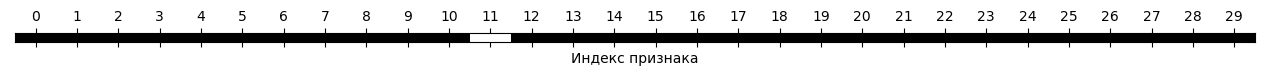

In [6]:
th = 0.8
transform_threshold = VarianceThreshold(threshold = (th * (1 - th)))
transform_threshold.fit_transform(df)
mask_th = transform_threshold.get_support()

plt.matshow(mask_th.reshape(1, -1), cmap = 'gray_r', aspect = 0.2);
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))
plt.yticks([])
plt.xlabel("Индекс признака")
transform_threshold.get_support().sum()
transform_threshold.get_feature_names_out()

In [7]:
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(df), 15))
# добавляем к данным шумовые признаки
# первые 30 признаков являются исходными, остальные 50 являются шумовыми
X_w_noise = np.hstack([df, noise])
X_train, X_test, y_train, y_test = train_test_split(X_w_noise, y, test_size=.5)

rfe_select = RFE(RandomForestRegressor(n_estimators=100, random_state=42),
             n_features_to_select=30)

rfe_select.fit(X_train, y_train)


# визуализируем отобранные признаки:
mask = rfe_select.get_support()
plt.matshow( mask.reshape(1,-1), cmap = 'gray_r', aspect=0.5)
plt.yticks([])
plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(1))
plt.xlabel("Индекс признака");

mask = rfe_select.get_support()[:30]
plt.matshow( mask.reshape(1,-1), cmap = 'gray_r', aspect=0.2)
plt.yticks([])
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))
plt.xlabel("Индекс признака");
rfe_select.get_feature_names_out()

KeyboardInterrupt: 

In [ ]:
# from sklearn.feature_selection  import RFE
# X_train, X_test, y_train, y_test = train_test_split(X_w_noise, df.price, test_size=.5)

# rfe_select = RFE(RandomForestRegressor(n_estimators=1000, random_state=42),
#              n_features_to_select=39)

# rfe_select.fit(X_train, y_train)


# # визуализируем отобранные признаки:
# mask = rfe_select.get_support()
# plt.matshow( mask.reshape(1,-1), cmap = 'gray_r', aspect=0.5)
# plt.yticks([])
# plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(1))
# plt.xlabel("Индекс признака");
# transform_threshold.get_support().sum()
# transform_threshold.get_feature_names_out()
# mask = rfe_select.get_support()[:40]
# plt.matshow( mask.reshape(1,-1), cmap = 'gray_r', aspect=0.2)
# plt.yticks([])
# plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))
# plt.xlabel("Индекс признака");
# transform_threshold.get_support().sum()
# transform_threshold.get_feature_names_out()

In [16]:
df_clean = df[['price','0', '3', '7', '8', '9', '10',  '13', '14',
       '15', '20', '23', '24', '25']]


In [17]:
X = df_clean.drop(columns = ['price'])
y = np.array(df_clean['price'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
gbrt = GradientBoostingRegressor(learning_rate=0.1, subsample=1, n_estimators=50, random_state=42)
gbrt.fit(X_train, y_train)

train_predictions = gbrt.predict(X_train)
test_predictions = gbrt.predict(X_test)

print('Mean Absolute Percentage Error on training set: {:.3f}'.format(mean_absolute_percentage_error(y_train, train_predictions)))
print('Mean Absolute Percentage Error on test set: {:.3f}'.format(mean_absolute_percentage_error(y_test, test_predictions)))

In [ ]:
min_features_to_select = 1

rfecv = RFECV(estimator = gbrt,
step = 1,
#cv = StratifiedKFold(2),
cv = 5,
scoring = "neg_mean_absolute_percentage_error",
min_features_to_select = min_features_to_select
)

rfecv.fit(X_train, y_train)

print("Оптимально : %d" % rfecv.n_features_)

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (NMAPE)")
filtered = pd.DataFrame(rfecv.cv_results_).filter(regex = 'split') #[s for s in rfecv.cv_results_.keys() if 'split' in s]
plt.plot(
range(min_features_to_select, len(filtered) + min_features_to_select),
filtered
)

plt.show()

In [ ]:
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(df), 15))
# добавляем к данным шумовые признаки
# первые 30 признаков являются исходными, остальные 50 являются шумовыми
X_w_noise = np.hstack([df, noise])
X_train, X_test, y_train, y_test = train_test_split(X_w_noise, y, test_size=.5)

rfe_select_gb = RFE(GradientBoostingRegressor(learning_rate=0.1, subsample=1, n_estimators=50, random_state=42),
             n_features_to_select=30)

rfe_select_gb.fit(X_train, y_train)


# визуализируем отобранные признаки:
mask = rfe_select.get_support()
plt.matshow( mask.reshape(1,-1), cmap = 'gray_r', aspect=0.5)
plt.yticks([])
plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(1))
plt.xlabel("Индекс признака");

mask = rfe_select.get_support()[:30]
plt.matshow( mask.reshape(1,-1), cmap = 'gray_r', aspect=0.2)
plt.yticks([])
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))
plt.xlabel("Индекс признака");
rfe_select_gb.get_feature_names_out()

In [ ]:
rf=RandomForestRegressor(n_estimators=1000, random_state=42,min_samples_leaf = 5)
rf.fit(X_train, y_train)
train_predictions = rf.predict(X_train)
test_predictions = rf.predict(X_test)

print('Mean Absolute Percentage Error on training set: {:.3f}'.format(mean_absolute_percentage_error(y_train, train_predictions)))
print('Mean Absolute Percentage Error on test set: {:.3f}'.format(mean_absolute_percentage_error(y_test, test_predictions)))

In [ ]:
min_features_to_select = 1

rfecv = RFECV(estimator = rf,
step = 1,
#cv = StratifiedKFold(2),
cv = 5,
scoring = "neg_mean_absolute_percentage_error",
min_features_to_select = min_features_to_select
)

rfecv.fit(X_train, y_train)

print("Оптимально : %d" % rfecv.n_features_)

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (NMAPE)")
filtered = pd.DataFrame(rfecv.cv_results_).filter(regex = 'split') #[s for s in rfecv.cv_results_.keys() if 'split' in s]
plt.plot(
range(min_features_to_select, len(filtered) + min_features_to_select),
filtered
)

plt.show()

In [ ]:
# CT = ColumnTransformer([
#         ("axis_transformer", axis_transformer, axis_features),
#         ("num", num, num_features),
#         ("cat", OneHotEncoder(sparse_output=False).set_output(transform='pandas'), cat_features),
#         ("ordinal_map", clarity_transformer, ['clarity'])
#        ]).set_output(transform='pandas')

In [ ]:
# df.hist(bins=30, figsize=(13, 20));
# plt.show()

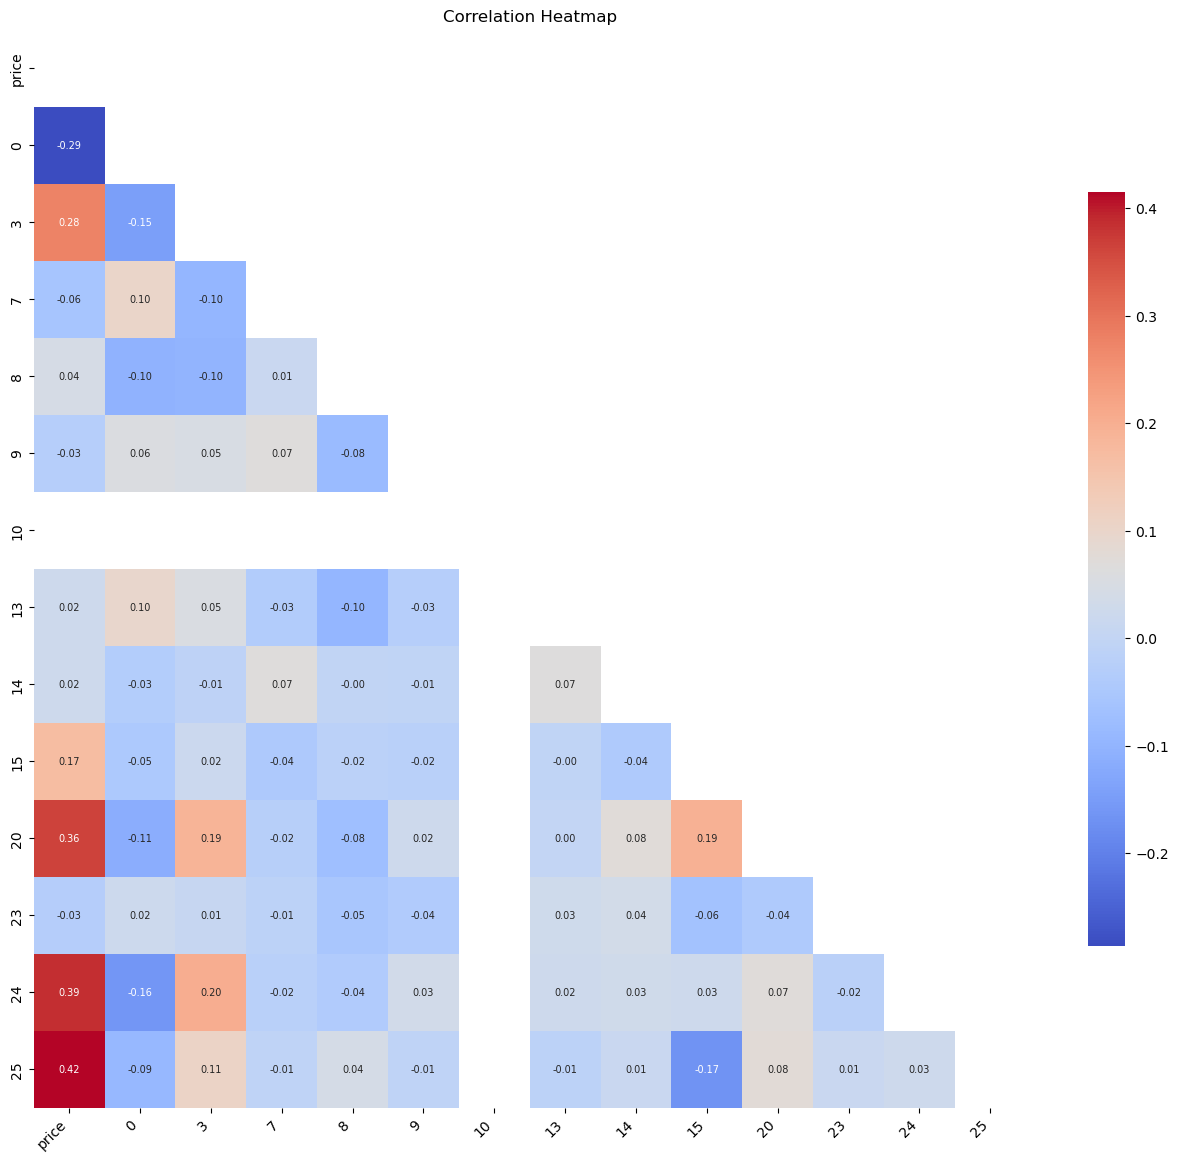

In [18]:
correlation_matrix = df_clean.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype = bool))

plt.figure(figsize = (16, 14))

sns.heatmap(correlation_matrix, mask = mask, cmap = 'coolwarm', annot = True, fmt = ".2f",
cbar_kws = {"shrink": 0.7}, annot_kws = {"size": 7})

plt.xticks(rotation = 45, ha = "right")
plt.title("Correlation Heatmap")

plt.show()